In [10]:
import numpy as np
# Erzeuge einen Superpositionszustand (α|0⟩ + β|1⟩)
alpha, beta = 1/np.sqrt(2), 1/np.sqrt(2)  # Gleichverteilung
qubit = np.array([alpha, beta])
print("Qubit-Vektor:", qubit)

Qubit-Vektor: [0.70710678 0.70710678]


In [11]:
import pandas as pd
# Beispiel-Lieferroute (Städte, Distanzen)
df = pd.DataFrame({"Stadt": ["Berlin", "München"], "Distanz_km": [300, 600]})
print(df)

     Stadt  Distanz_km
0   Berlin         300
1  München         600


In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

# Quantenschaltkreis erstellen
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])  # Explizite Messung

# Simulation mit der modernen Aer-API
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1024)  # Direkte Verwendung des Backends
result = job.result()
counts = result.get_counts()

print("Schaltkreis:")
print(qc.draw())
print("\nMessergebnisse:", counts)

Schaltkreis:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Messergebnisse: {'11': 527, '00': 497}


In [13]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer  # Sollte jetzt funktionieren

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
print(qc.draw())

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


Ergebnis: {'11': 1493, '00': 1507}


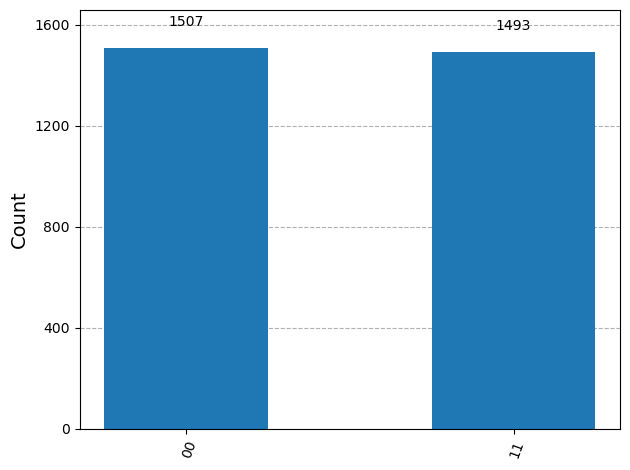

In [83]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Achtung: "aer" statt "Aer"!

# 1. Quantenschaltkreis erstellen
qc = QuantumCircuit(2)
qc.h(0)          # Hadamard-Gatter (Superposition)
qc.cx(0, 1)      # CNOT (Verschränkung)
qc.measure_all() # Messung

# 2. Simulation mit AerSimulator
simulator = AerSimulator()  # Neu: Direkte Instanzierung
job = simulator.run(qc, shots=3000)  # Modernes Interface
result = job.result()
counts = result.get_counts()

# 3. Ergebnis plotten
print("Ergebnis:", counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [85]:
import qiskit
print(qiskit.__version__)  # Sollte >= 0.39.0 sein

2.0.2


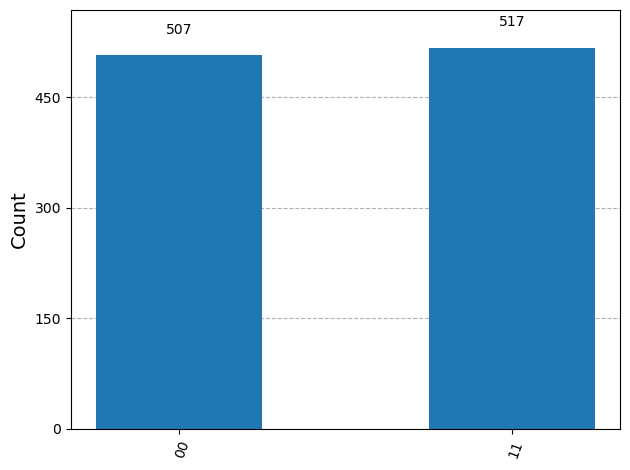

{'11': 517, '00': 507}


In [96]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
plt.show()

print(counts)


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Schaltkreis erstellen
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Simulator definieren und ausführen
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Visualisierung
plot_histogram(counts, title="Bell-Zustand Messergebnisse")
plt.show()
